In [1]:
import os
print(os.getcwd())


C:\Users\PC


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [4]:
car=pd.read_csv("C:/Users/PC/Downloads/CAR_Price_Prediction/quikr_car.csv")

In [5]:
car.head()

,name,company,year,kms_driven,fuel_type,Price
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"45,000 kms",Petrol,"80,000"
1,Mahindra Jeep CL550 MDI,Mahindra,2006,40 kms,Diesel,"4,25,000"
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,"22,000 kms",Petrol,Ask For Price
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"28,000 kms",Petrol,"3,25,000"
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"36,000 kms",Diesel,"5,75,000"


In [9]:
car.shape

(892, 6)

In [11]:
car.info

<bound method DataFrame.info of                                        name    company  year  kms_driven  \
0      Hyundai Santro Xing XO eRLX Euro III    Hyundai  2007  45,000 kms   
1                   Mahindra Jeep CL550 MDI   Mahindra  2006      40 kms   
2                Maruti Suzuki Alto 800 Vxi     Maruti  2018  22,000 kms   
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT    Hyundai  2014  28,000 kms   
4          Ford EcoSport Titanium 1.5L TDCi       Ford  2014  36,000 kms   
..                                      ...        ...   ...         ...   
887                                      Ta       Tara  zest         NaN   
888                     Tata Zest XM Diesel       Tata  2018  27,000 kms   
889                      Mahindra Quanto C8   Mahindra  2013  40,000 kms   
890                Honda Amaze 1.2 E i VTEC      Honda  2014      Petrol   
891               Chevrolet Sail 1.2 LT ABS  Chevrolet  2014      Petrol   

    fuel_type          Price  
0      Petrol         80

In [13]:

backup=car.copy()

In [15]:
car = car[car['year'].str.isnumeric()]
car['year'] = car['year'].astype(int)



C:\Users\PC\AppData\Local\Temp\ipykernel_5792\3249173446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['year'] = car['year'].astype(int)


In [17]:
car = car[car['Price'] != 'Ask For Price']
car['Price'] = car['Price'].str.replace(',', '').astype(int)




In [19]:

car=car[~car['fuel_type'].isna()]

In [21]:
car.shape

(816, 6)

In [23]:

car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [25]:

car=car.reset_index(drop=True)

In [27]:
car

,name,company,year,kms_driven,fuel_type,Price
0,Hyundai Santro Xing,Hyundai,2007,"45,000 kms",Petrol,80000
1,Mahindra Jeep CL550,Mahindra,2006,40 kms,Diesel,425000
2,Hyundai Grand i10,Hyundai,2014,"28,000 kms",Petrol,325000
3,Ford EcoSport Titanium,Ford,2014,"36,000 kms",Diesel,575000
4,Ford Figo,Ford,2012,"41,000 kms",Diesel,175000
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,"50,000 kms",Petrol,270000
812,Tata Indica V2,Tata,2009,"30,000 kms",Diesel,110000
813,Toyota Corolla Altis,Toyota,2009,"1,32,000 kms",Petrol,300000
814,Tata Zest XM,Tata,2018,"27,000 kms",Diesel,260000


In [29]:
car.info

<bound method DataFrame.info of                        name   company  year    kms_driven fuel_type   Price
0       Hyundai Santro Xing   Hyundai  2007    45,000 kms    Petrol   80000
1       Mahindra Jeep CL550  Mahindra  2006        40 kms    Diesel  425000
2         Hyundai Grand i10   Hyundai  2014    28,000 kms    Petrol  325000
3    Ford EcoSport Titanium      Ford  2014    36,000 kms    Diesel  575000
4                 Ford Figo      Ford  2012    41,000 kms    Diesel  175000
..                      ...       ...   ...           ...       ...     ...
811      Maruti Suzuki Ritz    Maruti  2011    50,000 kms    Petrol  270000
812          Tata Indica V2      Tata  2009    30,000 kms    Diesel  110000
813    Toyota Corolla Altis    Toyota  2009  1,32,000 kms    Petrol  300000
814            Tata Zest XM      Tata  2018    27,000 kms    Diesel  260000
815      Mahindra Quanto C8  Mahindra  2013    40,000 kms    Diesel  390000

[816 rows x 6 columns]>

In [31]:

car.describe(include='all')

,name,company,year,kms_driven,fuel_type,Price
count,816,816,816.000000,816,816,8.160000e+02
unique,254,25,NaN,248,3,NaN
top,Maruti Suzuki Swift,Maruti,NaN,"45,000 kms",Petrol,NaN
freq,51,221,NaN,30,428,NaN
mean,NaN,NaN,2012.444853,NaN,NaN,4.117176e+05
std,NaN,NaN,4.002992,NaN,NaN,4.751844e+05
min,NaN,NaN,1995.000000,NaN,NaN,3.000000e+04
25%,NaN,NaN,2010.000000,NaN,NaN,1.750000e+05
50%,NaN,NaN,2013.000000,NaN,NaN,2.999990e+05
75%,NaN,NaN,2015.000000,NaN,NaN,4.912500e+05


In [41]:

car=car[car['Price']<6000000]

In [43]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [45]:
car.to_csv("Cleaned_Car_data.csv", index=False)

In [47]:

import seaborn as sns

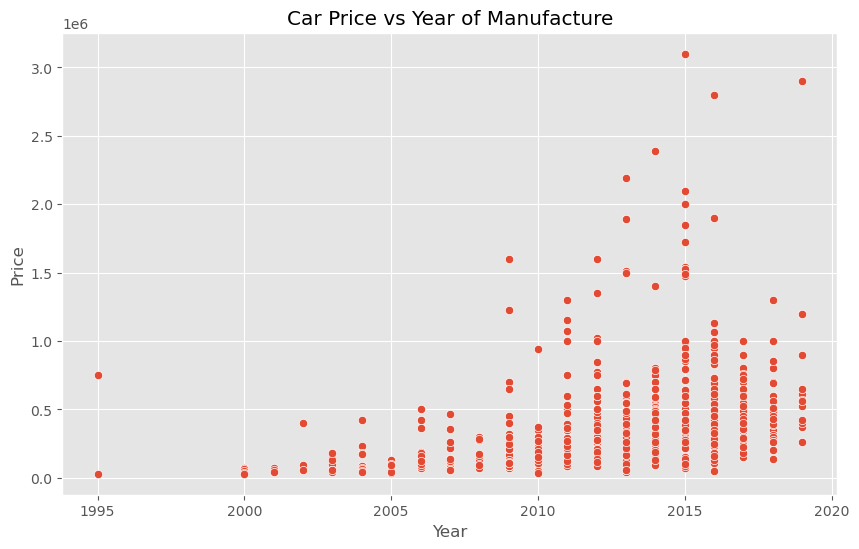

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=car['year'], y=car['Price'], alpha=1.0)
plt.title("Car Price vs Year of Manufacture")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

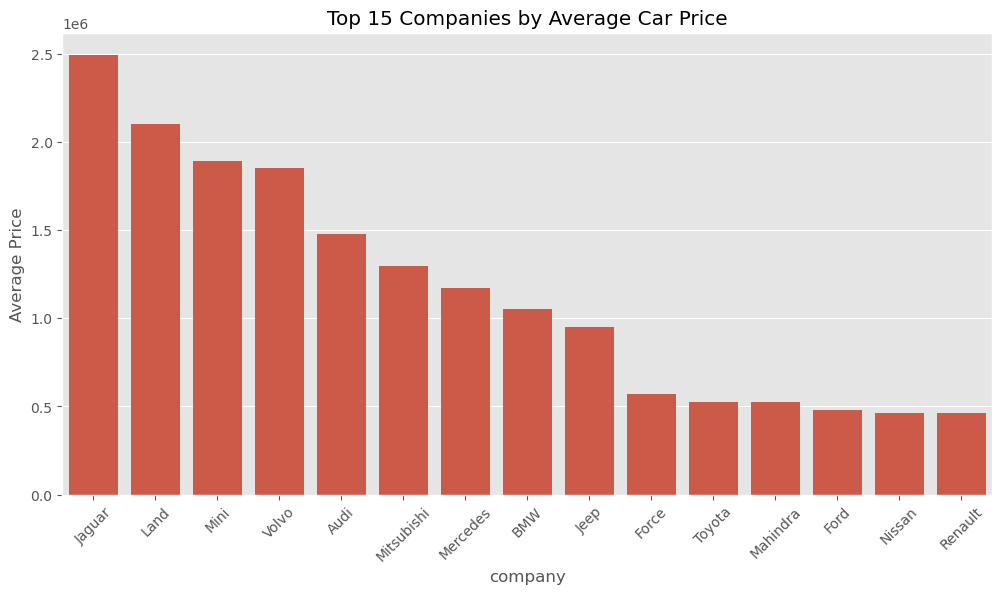

In [50]:
plt.figure(figsize=(12,6))
company_price = car.groupby("company")['Price'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=company_price.index, y=company_price.values)
plt.title("Top 15 Companies by Average Car Price")
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.show()

In [53]:
car.loc[:, 'kms_driven'] = car['kms_driven'].str.replace(' kms','', regex=False)
car.loc[:, 'kms_driven'] = car['kms_driven'].str.replace(',','', regex=False)
car.loc[:, 'kms_driven'] = car['kms_driven'].str.strip()
car.loc[:, 'kms_driven'] = pd.to_numeric(car['kms_driven'], errors='coerce')

car = car.dropna(subset=['kms_driven'])
car.loc[:, 'kms_driven'] = car['kms_driven'].astype(int)



In [55]:

X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [57]:

X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [59]:
y.shape

(815,)

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [62]:

from sklearn.linear_model import LinearRegression


In [63]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [66]:

ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [69]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [71]:
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)

In [72]:

pipe.fit(X_train, y_train)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [73]:

y_pred=pipe.predict(X_test)

In [74]:

r2_score(y_test,y_pred)

0.5974635142011967

In [75]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [77]:

np.argmax(scores)

302

In [78]:
scores[np.argmax(scores)]


0.8991138463319752

In [80]:
pipe.predict(pd.DataFrame(columns=X_test.columns,
                          data=np.array(['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']).reshape(1, 5)))


array([430287.74002343])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

0.8991138463319752

In [84]:
# ==========================
# Import Libraries
# ==========================
import pandas as pd
import numpy as np
import pickle
import streamlit as st

# ==========================
# Load Model
# ==========================
pipe = pickle.load(open('LinearRegressionModel.pkl', 'rb'))

# ==========================
# Streamlit UI
# ==========================
st.set_page_config(page_title="Car Price Predictor", layout="centered")

st.title("🚗 Car Price Prediction App")
st.write("Fill in the details below and get an estimated car price.")

# Sidebar
st.sidebar.header("Input Car Details")

# Inputs
name = st.sidebar.text_input("Car Name", "Maruti Suzuki Swift")
company = st.sidebar.text_input("Company", "Maruti")
year = st.sidebar.number_input("Year", min_value=1990, max_value=2025, step=1, value=2019)
kms_driven = st.sidebar.number_input("KMs Driven", min_value=0, step=100, value=10000)
fuel_type = st.sidebar.selectbox("Fuel Type", ["Petrol", "Diesel"])

# Predict Button
if st.sidebar.button("Predict Price 💰"):
    input_data = pd.DataFrame(
        [[name, company, year, kms_driven, fuel_type]],
        columns=['name', 'company', 'year', 'kms_driven', 'fuel_type']
    )
    predicted_price = pipe.predict(input_data)[0]

    st.success(f"### ✅ Estimated Price: ₹ {int(predicted_price):,}")


2025-08-26 11:59:21.443 
  command:

    streamlit run C:\Users\PC\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-26 11:59:21.443 Session state does not function when running a script without `streamlit run`
